In [2]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Задание

- поделить на test и train (test не меньше чем 25%)
- поэкспериментировать с глубиной дерева, посмотреть на графике оценку на test и train
- подобрать наилучшее дерево с RandomizedSearch, визуализировать его (* с помощью GridSearch)
- проанализировать признаки (features), отсортировать их по важности, выбрать 2 наиболее важные
- построить confusion_matrix для наилучшего дерева

In [7]:

x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [9]:
import numpy as np
depth = 1
f1 = 0
max_depth_range = range(1,30)
rs = np.random.seed(0)

score_data = pd.DataFrame()
for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    # score_data =  max_depth train_score test_score
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    score_data = pd.concat([score_data, temp_score_data])

score_data.head(20)

,max_depth,train_score,test_score
0,1,0.66,0.68
0,2,0.95,0.98
0,3,0.97,0.98
0,4,0.98,0.98
0,5,0.99,0.98
0,6,1.00,0.98
0,7,1.00,0.98
0,8,1.00,0.98
0,9,1.00,0.98
0,10,1.00,0.98


<Axes: xlabel='max_depth'>

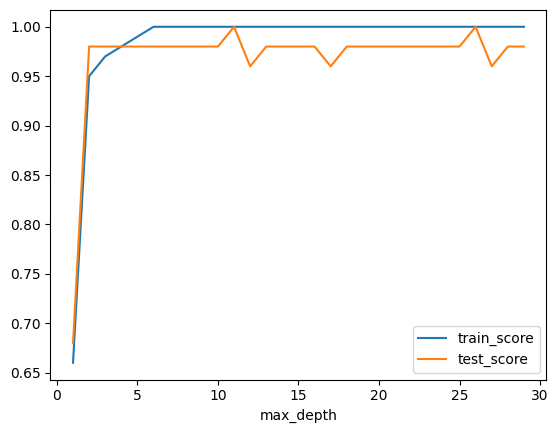

In [10]:
score_data.plot(x= 'max_depth')

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(criterion='entropy')
parameters = {'max_depth': range(1,10), 'min_samples_split': range(2,40), 'criterion': ['gini', 'entropy', 'log_loss'], 'min_samples_leaf': range(1, 30)}

search = GridSearchCV(clf, parameters, scoring='f1_micro')
search.fit(x,y)
best_tree = search.best_estimator_
print(search.best_score_)
print(search.best_params_)

0.9733333333333334
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 6}


[Text(0.375, 0.875, 'petal width <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.625, 'petal width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(0.25, 0.375, 'petal length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(0.75, 0.375, 'petal length <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = Virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = Virginica')]

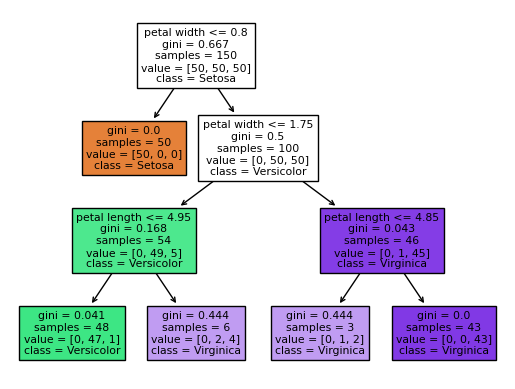

In [12]:
fn = ['sepal length', 'sepal width', 'petal length', 'petal width']
cn = ['Setosa', 'Versicolor', 'Virginica']
tree.plot_tree(best_tree, filled=True, class_names=cn, feature_names=fn)

<Axes: >

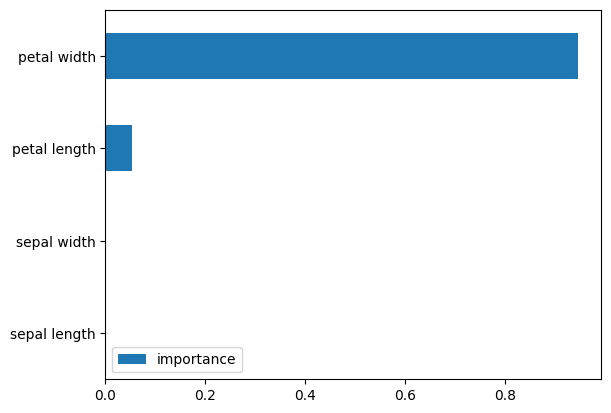

In [13]:
importances_df = pd.DataFrame(best_tree.feature_importances_, columns=['importance'], index=fn)
importances_df.sort_values(by='importance').plot(kind='barh')

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm


array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

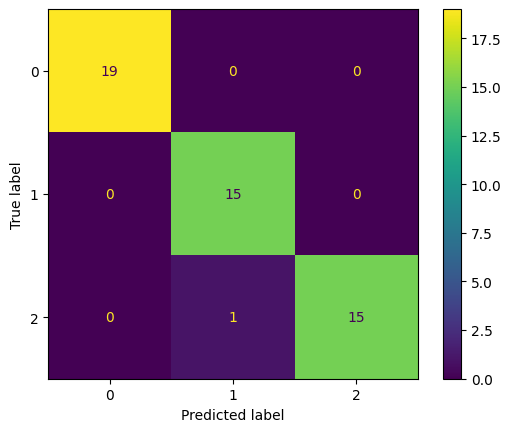

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()